### Qu'est ce que le SVC ?

Basé sur le SVM (Support Vector Machine, ou Machine à Vecteurs de Support en français), c'est un modèle de classification fonctionnant en identifiant un hyperplan (droite en 2D ou surface en 3D) de séparation optimale entre différentes classes (features) dans l'espace. 
Il peut être utilisé aussi bien pour la classification binaire que multi-classe.

Le SVC (Support Vector Classification, ou Classification par Vecteurs de Support en français) est une implémentation de l'algorithme SVM pour la classification. 
Il utilise un noyau (kernel) pour transformer les données d'entrée dans un espace de features de plus haute dimension, de manière à ce qu'un hyperplan de séparation puisse être trouvé facilement.
Grossièrement le noyau correspond à la fonction générée pour produire l'hyperplan (droite ou plan).

Le SVM est souvent utilisé lorsque les données sont "linéairement séparable", c'est-à-dire qu'il existe un hyperplan qui peut séparer clairement les différentes classes les unes des autres. 
Si les données ne sont pas linéairement séparables, le SVM peut quand même être utilisé en utilisant un noyau qui transforme les données dans un espace de features de plus haute dimension où elles deviennent linéairement séparables.

Le SVM est souvent considéré comme un modèle de classification robuste et performant, en particulier lorsque les données ont un nombre élevé de dimensions (c'est-à-dire sont à "haute dimension"). 
Cependant, il peut être relativement lent à entraîner lorsque les données ont un grand nombre d'exemples (c'est-à-dire sont à "grande échelle").


This is Leona 


### Ci-dessous une liste des hyperparamètres les plus courament utilisés pour optimiser le modèle de SVC:

C : ce paramètre contrôle la force de régularisation du modèle. 
Plus C est grand, plus le modèle sera complexe et donc plus il y a de chances qu'il surapprenne (c'est-à-dire qu'il s'ajuste trop bien aux données d'entraînement au détriment de sa généralisation aux données de test). 
Un C faible signifie une régularisation forte et un modèle moins complexe.

kernel : ce paramètre spécifie quel type de noyau utiliser pour transformer les données d'entrée dans un espace de features de plus haute dimension. Les options courantes incluent "linear" (pour un noyau linéaire), "rbf" (p our un noyau gaussien, aussi appelé "radial basis function"), et "poly" (pour un noyau polynomial).
  
degree : ce paramètre est utilisé lorsque le noyau "poly" est sélectionné et spécifie le degré du polynôme à utiliser.

gamma : ce paramètre est utilisé lorsque le noyau "rbf" ou "poly" est sélectionné et contrôle la complexité du modèle. Plus gamma est grand, plus le modèle sera complexe et donc plus il y a de chances qu'il surapprenne.

coef0 : ce paramètre est utilisé lorsque le noyau "poly" est sélectionné et contrôle le degré de liberté du modèle.

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv('mushrooms.csv')

In [59]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
df.shape

(8124, 23)

In [61]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [62]:
df.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [63]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [64]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


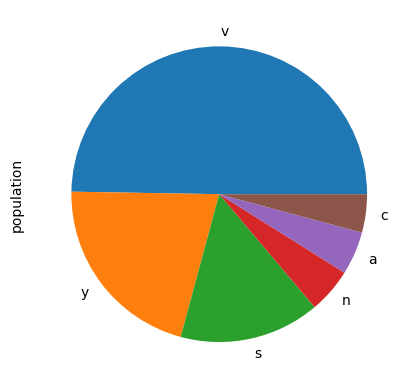

In [65]:
df.population.value_counts().plot(kind='pie');

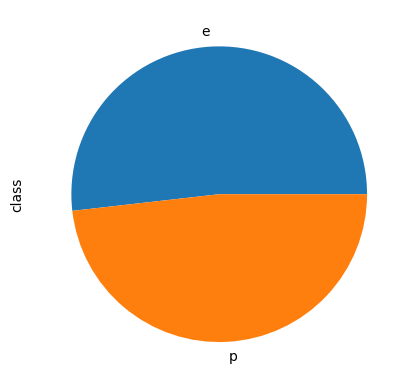

In [66]:
df['class'].value_counts().plot(kind='pie');